# Tkinter

Is library for building interfaces with python.

## Examples displaying

Obviously, pages associated with tkinter will contain a ton of screenshots, so it would be great to have an opportunity to build them automatically.

The following code snippet demonstrates how to save a module that captures screenshots of a specified tkinter window.

In [1]:
%%writefile tkinter_files/screenshot.py
import tkinter as tk
import pyscreenshot as ImageGrab

def take_screenshot(root:tk.Tk):
    '''
    Taking screeshot of the given
    tkinter application. And displays
    it using jupyter funciton `display`.

    Parameters
    ----------
    root:tk.Tk
        tkinter application instalce;
    '''
    root.update()
    
    x = root.winfo_rootx()
    y = root.winfo_rooty()
    w = x + root.winfo_width()
    h = y + root.winfo_height()
    
    screenshot = ImageGrab.grab(bbox=(x, y, w, h))
    
    root.destroy()
    display(screenshot)

Overwriting tkinter_files/screenshot.py


Here is an example of how this module can be utilized, allowing you to display the results of your tkinter programs without leaving the Jupyter Notebook environment.

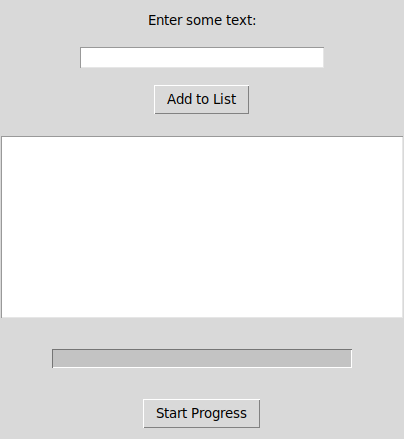

In [4]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
from tkinter_files.screenshot import take_screenshot

class SimpleApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Simple Tkinter Interface")

        # Label
        self.label = tk.Label(
            root, 
            text="Enter some text:"
        )
        self.label.pack(pady=10)

        # Entry
        self.entry = tk.Entry(root, width=30)
        self.entry.pack(pady=5)

        # Button
        self.button = tk.Button(
            root, text="Add to List", 
            command=self.add_to_list
        )
        self.button.pack(pady=10)

        # Listbox
        self.listbox = tk.Listbox(root, width=50, height=10)
        self.listbox.pack(pady=10)

        # Progress Bar
        self.progress = ttk.Progressbar(
            root, orient="horizontal", 
            length=300, mode="determinate"
        )
        self.progress.pack(pady=20)

        # Start Progress Bar Button
        self.progress_button = tk.Button(
            root, text="Start Progress", 
            command=self.start_progress
        )
        self.progress_button.pack(pady=10)

    def add_to_list(self):
        text = self.entry.get()
        if text:
            self.listbox.insert(tk.END, text)
            self.entry.delete(0, tk.END)
        else:
            messagebox.showwarning("Warning", "Please enter some text.")

    def start_progress(self):
        self.progress["value"] = 0
        self.progress["maximum"] = 100
        self.update_progress()

    def update_progress(self):
        if self.progress["value"] < 100:
            self.progress["value"] += 10
            self.root.after(500, self.update_progress)
        else:
            messagebox.showinfo("Info", "Progress complete!")

# Create the main application window
root = tk.Tk()
app = SimpleApp(root)
root.after(200, take_screenshot, root)
root.mainloop()